# Predictive Risk Analysis for Loan Default

#### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#### Loading Dataset

In [ ]:
df=pd.read_csv('Loan_default.csv')
df

### Basic Analysis

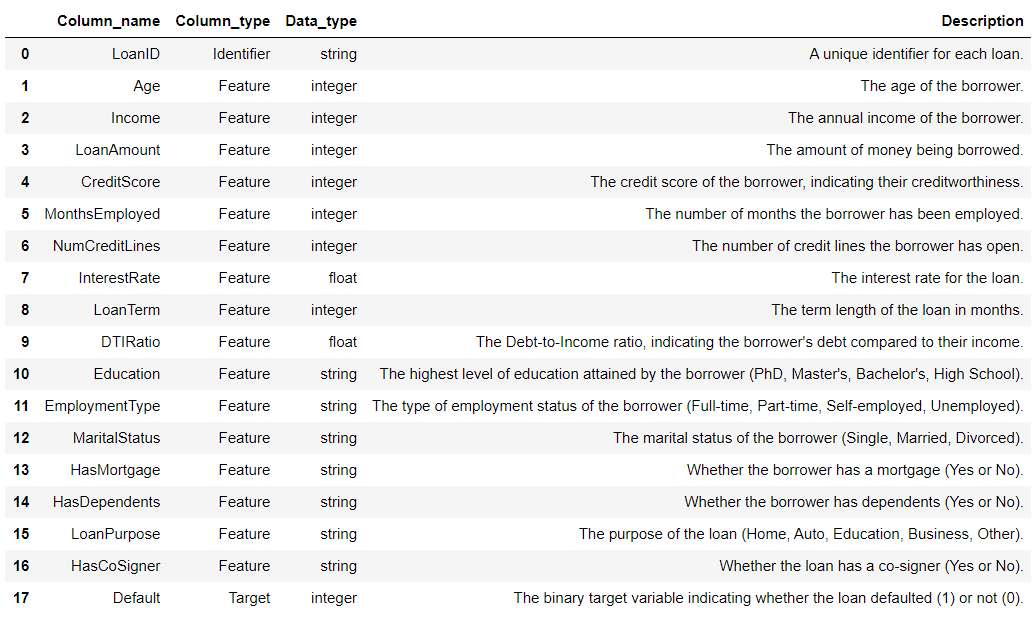

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
print("\nDefault (Target Variable) Distribution:")
print(df['Default'].value_counts(normalize=True))

#### Let's convert binary categorical columns ('Yes'/'No') to integers (1/0)

In [ ]:
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
df

#### Row Wise Analysis

In [ ]:
df['Age'].value_counts()

In [ ]:
df['CreditScore'].value_counts() # We would make classification in it

In [ ]:
df['DTIRatio'].value_counts()

In [ ]:
df['Default'].value_counts()

In [ ]:
df['Education'].value_counts()

In [ ]:
df['EmploymentType'].value_counts()

In [ ]:
df['HasCoSigner'].value_counts()

In [ ]:
df['HasDependents'].value_counts()

In [ ]:
df['HasMortgage'].value_counts()

In [ ]:
df['Income'].value_counts()

In [ ]:
df['InterestRate'].value_counts()

In [ ]:
df['LoanAmount'].value_counts()

In [ ]:
df['LoanPurpose'].value_counts()

In [ ]:
df['LoanTerm'].value_counts()

In [ ]:
df['MaritalStatus'].value_counts()

In [ ]:
df['MonthsEmployed'].value_counts()

In [ ]:
df['NumCreditLines'].value_counts()

#### Making Classification based on Number of Loan Applicants

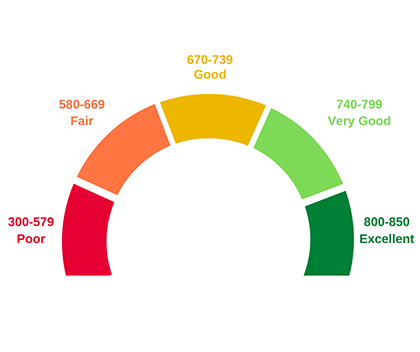

In [ ]:
bins=[300,579,669,739,799,850]
labels=['Poor','Fair','Good','Very Good','Excellent']
df['CS_Cat']=pd.cut(df['CreditScore'],bins=bins,labels=labels,include_lowest=True)

default_rate=df.groupby('CS_Cat',observed=False)['LoanID'].count().reset_index()

print("Loan Applicants by Credit Score Category:")
print(default_rate)

In [ ]:
bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
labels=['<=0.1','0.1-0.2','0.2-0.3','0.3-0.4','0.4-0.5','0.5-0.6','0.6-0.7','0.7-0.8','0.8-0.9']
df['DTIR_Cat']=pd.cut(df['DTIRatio'],bins=bins,labels=labels,include_lowest=True)

default_rate=df.groupby('DTIR_Cat',observed=False)['LoanID'].count().reset_index()

print("Loan Applicants by DTI Ratio:")
print(default_rate)

In [ ]:
print(min(df['Income']))
print(max(df['Income']))

In [ ]:
bins=[0,15000,30000,45000,60000,75000,90000,105000,120000,135000,150000]
labels=['<=15K','15K-30K','30K-45K','45K-60K','60K-75K','75K-90K','90K-105K','105K-120K','120K-135K','135K-150K']
df['Income_Cat']=pd.cut(df['Income'],bins=bins,labels=labels,include_lowest=True)

default_rate=df.groupby('Income_Cat',observed=False)['LoanID'].count().reset_index()

print("Loan Applicants by Income:")
print(default_rate)

In [ ]:
print(min(df['InterestRate']))
print(max(df['InterestRate']))

In [ ]:
bins=[0,5,10,15,20,25]
labels=['<=5','5-10','10-15','15-20','20-25']
df['IR_Cat']=pd.cut(df['InterestRate'],bins=bins,labels=labels,include_lowest=True)

default_rate=df.groupby('IR_Cat',observed=False)['LoanID'].count().reset_index()

print("Loan Applicants by Interest Rate:")
print(default_rate)

In [ ]:
print(min(df['LoanAmount']))
print(max(df['LoanAmount']))

In [ ]:
bins=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000]
labels=['<=25K','25K-50K','50K-75K','75K-100K','100K-125K','125K-150K','150K-175K','175K-200K','200K-225K','225K-250K']
df['LA_Cat']=pd.cut(df['LoanAmount'],bins=bins,labels=labels,include_lowest=True)

default_rate=df.groupby('LA_Cat',observed=False)['LoanID'].count().reset_index()

print("Loan Applicants by Loan Amount:")
print(default_rate)

In [ ]:
df

In [ ]:
cat = ['CS_Cat','DTIR_Cat','Income_Cat','IR_Cat','LA_Cat']

print("Percentage Breakdown by Category for Defaults(1) vs. Non-Defaults(0)")

for category in cat:
    print(f"Breakdown by {category}")

    breakdown=df.groupby([category,'Default'],observed=False).size().unstack(fill_value=0) 
    perc_breakdown=breakdown.div(breakdown.sum(axis=1),axis=0)
    perc_breakdown.columns=['No Default (0)','Default (1)']
    print(perc_breakdown.map('{:.2%}'.format))
    
    print("="*50)

In [ ]:
# 1. Loan-to-Income Ratio
df['Loan_to_Income_Ratio']=(df['LoanAmount']/df['Income']).round(4)

# 2. DTI per Credit Line
df['DTI_per_Line']= (df['DTIRatio']/(df['NumCreditLines']+0.001)).round(4)

print("Created new features: 'Loan_to_Income_Ratio' and 'DTI_per_Line'")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='Default',y='Loan_to_Income_Ratio',data=df)
plt.title('Loan-to-Income Ratio by Loan Status')
plt.ylim(0,df['Loan_to_Income_Ratio'].quantile(0.95)) 

plt.subplot(1,2,2)
sns.boxplot(x='Default',y='DTI_per_Line',data=df)
plt.title('DTI per Line by Loan Status')
plt.ylim(0,df['DTI_per_Line'].quantile(0.95)) 

plt.tight_layout()
plt.show()

In [ ]:
df

#### Saving new csv file

In [ ]:
df.to_csv('Loan_default_with_categories.csv',index=False)